In [ ]:
import os
import numpy as np
import pandas as pd

In [7]:
%cd Course-094295_hw1

[Errno 2] No such file or directory: 'Course-094295_hw1'
/home/student/Course-094295_hw1


In [8]:
train_folder = 'data/train'
test_folder = 'data/test'

In [9]:
def read_all_data(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith('psv'):
            _id = int(file.replace('.psv', '').split('_')[1])
            df = pd.read_csv(os.path.join(folder, file), sep='|')
            df['id'] = _id
            files.append(df)
    return pd.concat(files, ignore_index=True)

In [10]:
t_df = read_all_data(train_folder)
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,1,0,10022
1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,2,0,10022
2,54.0,97.0,36.4,128.0,58.0,36.0,23.0,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,3,0,10022
3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,4,0,10022
4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,5,0,10022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766879,85.0,92.0,NaN,116.0,93.0,79.0,20.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,33,0,8234
766880,87.0,94.0,36.9,137.0,107.0,91.0,26.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,34,0,8234
766881,121.0,97.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,35,0,8234
766882,95.0,91.0,NaN,138.5,107.0,87.5,20.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,36,0,8234


In [11]:
vital_signs = t_df.columns[:8]
lab_values = t_df.columns[8: 34]
demographics = t_df.columns[34: 40]
outcome = t_df.columns[40]
_id = t_df.columns[-1]

# Filling NA values

In [12]:
def add_ICULOS_rows(g):
    first_hour = g.ICULOS.iloc[0]
    if first_hour != 1:
        ICULOS_hours = {'ICULOS': list(range(1, first_hour))}
        g = pd.concat([pd.DataFrame(ICULOS_hours), g])
        g[demographics] = g[demographics].bfill()
        g[outcome] = g[outcome].bfill()
        g[_id] = g[_id].bfill()
    return g

In [13]:
t_df = t_df.sort_values(['id', 'ICULOS']).groupby('id').apply(add_ICULOS_rows).reset_index(drop=True)
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75.91,0.0,0.0,1.0,-98.60,1,0.0,0.0
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,NaN,NaN,NaN,...,NaN,NaN,75.91,0.0,0.0,1.0,-98.60,2,0.0,0.0
2,64.0,98.0,NaN,125.0,64.0,41.0,27.0,NaN,NaN,NaN,...,NaN,NaN,75.91,0.0,0.0,1.0,-98.60,3,0.0,0.0
3,56.0,100.0,NaN,123.0,65.0,41.0,9.0,NaN,NaN,NaN,...,NaN,NaN,75.91,0.0,0.0,1.0,-98.60,4,0.0,0.0
4,66.0,99.0,NaN,120.0,67.0,43.0,23.0,NaN,NaN,NaN,...,NaN,NaN,75.91,0.0,0.0,1.0,-98.60,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,76.0,NaN,NaN,85.0,53.0,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,50,0.0,19999.0
776769,81.0,99.0,NaN,99.0,51.0,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,51,0.0,19999.0
776770,85.0,100.0,NaN,103.0,48.0,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,52,0.0,19999.0
776771,86.0,93.0,NaN,87.0,44.0,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,53,0.0,19999.0


In [14]:
def add_unknown_unit_column(df):
    df['Unit3'] = 0.0
    df.loc[df.Unit1.isna(), 'Unit3'] = 1.0  # we know Unit2 is also nan when Unit1 is nan
    df[['Unit1', 'Unit2']] = df[['Unit1', 'Unit2']].fillna(0.0)
    return df

In [15]:
t_df = add_unknown_unit_column(t_df)
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,1,0.0,0.0,0.0
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,2,0.0,0.0,0.0
2,64.0,98.0,NaN,125.0,64.0,41.0,27.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,3,0.0,0.0,0.0
3,56.0,100.0,NaN,123.0,65.0,41.0,9.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,4,0.0,0.0,0.0
4,66.0,99.0,NaN,120.0,67.0,43.0,23.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,76.0,NaN,NaN,85.0,53.0,NaN,17.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,50,0.0,19999.0,1.0
776769,81.0,99.0,NaN,99.0,51.0,NaN,17.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,51,0.0,19999.0,1.0
776770,85.0,100.0,NaN,103.0,48.0,NaN,26.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,52,0.0,19999.0,1.0
776771,86.0,93.0,NaN,87.0,44.0,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,53,0.0,19999.0,1.0


# Fixing vital signs data

In [16]:
def fix_and_smooth(df, col, low=None, high=None, com=0.5):
    if low and high:
        df.loc[(df[col] >= high) | (df[col] <= low), col] = np.nan
    df[col] = t_df.groupby('id')[col].ewm(com=com).mean().bfill().ffill().reset_index(level=0, drop=True)
    t_df[vital_signs].boxplot(column=col)
    return t_df[col]

## Heart Rate

<AxesSubplot:>

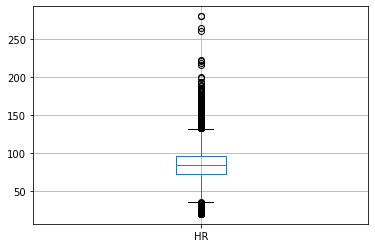

In [17]:
t_df[vital_signs].boxplot(column='HR')

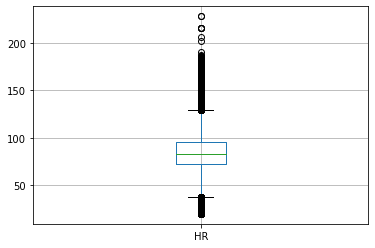

In [18]:
# all values are "reasonable" - we just smooth
t_df['HR'] = fix_and_smooth(t_df, 'HR')

## Pulse oximetry

<AxesSubplot:>

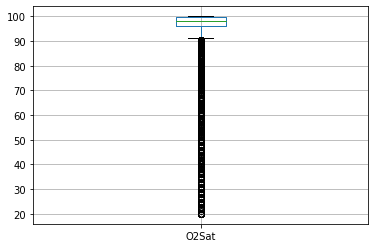

In [19]:
t_df[vital_signs].boxplot(column='O2Sat')

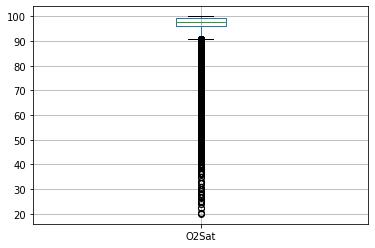

In [20]:
# all values are "reasonable" - we just smooth
t_df['O2Sat'] = fix_and_smooth(t_df, 'O2Sat')

## Temperature

<AxesSubplot:>

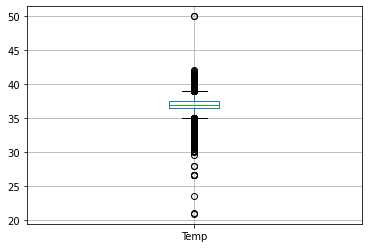

In [21]:
t_df[vital_signs].boxplot(column='Temp')

We use our prior knowledge together with the boxplot to determine invalid temperature values (30 < temp < 43)

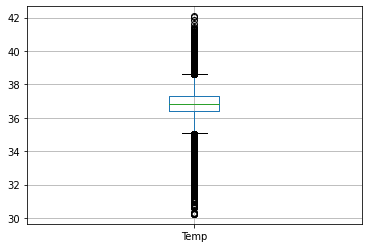

In [22]:
t_df['Temp'] = fix_and_smooth(t_df, 'Temp', low=30, high=43)

## Systolic Blood Pressure

<AxesSubplot:>

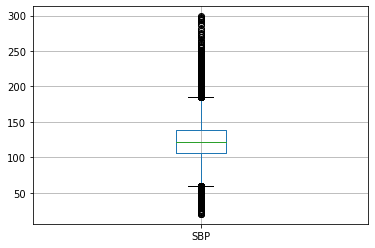

In [23]:
t_df[vital_signs].boxplot(column='SBP')

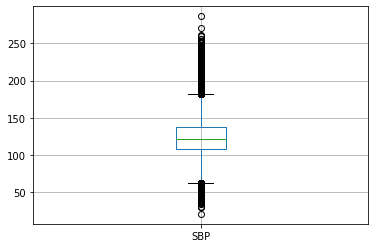

In [24]:
# all values are "reasonable" - we just smooth
t_df['SBP'] = fix_and_smooth(t_df, 'SBP')

## Mean arterial pressure

<AxesSubplot:>

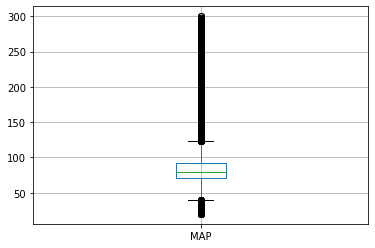

In [25]:
t_df[vital_signs].boxplot(column='MAP')

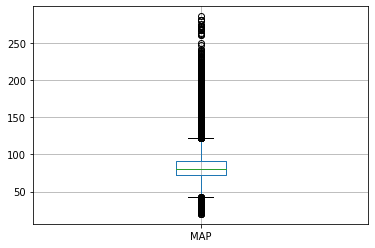

In [26]:
# all values are "reasonable" - we just smooth
t_df['MAP'] = fix_and_smooth(t_df, 'MAP')

## Diastolic Blood Pressure

<AxesSubplot:>

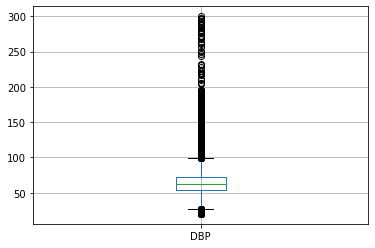

In [27]:
t_df[vital_signs].boxplot(column='DBP')

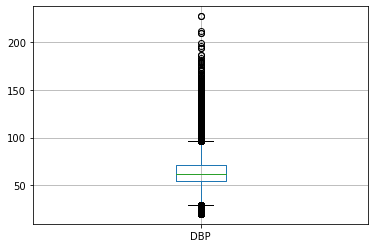

In [28]:
t_df['DBP'] = fix_and_smooth(t_df, 'DBP', low=1, high=250)

## Respiration rate

<AxesSubplot:>

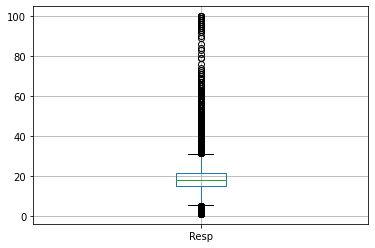

In [29]:
t_df[vital_signs].boxplot(column='Resp')

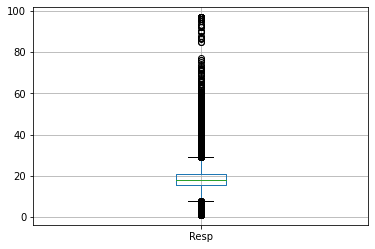

In [30]:
# all values are "reasonable" - we just smooth
t_df['Resp'] = fix_and_smooth(t_df, 'Resp')

## End tidal carbon dioxide

<AxesSubplot:>

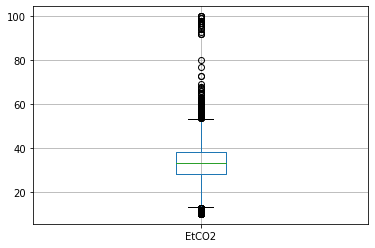

In [31]:
t_df[vital_signs].boxplot(column='EtCO2')

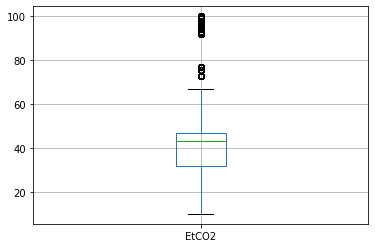

In [32]:
# all values are "reasonable" - we just smooth
t_df['EtCO2'] = fix_and_smooth(t_df, 'EtCO2')

# Engineering Laboratory Values
Due to the fact the values are hard to interoperate (inconsistent pattern of examination) we instead measure the examination frequency of each test for each patient

In [33]:
t_df[lab_values] = t_df[lab_values].notna().astype(int)  # marking all NAN as 0 and values as 1
# summing to get the amount of tests for each column than dividing by hours passed so far
t_df[lab_values] = t_df[list(lab_values) + ['id']].groupby('id').cumsum().divide(t_df['ICULOS'], axis=0)
t_df[lab_values]

,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,0.140000,0.040000,0.080000,0.140000,0.120000,0.080000,0.020000,0.040000,0.020000,0.040000,...,0.040000,0.040000,0.020000,0.0,0.040000,0.040000,0.0,0.040000,0.0,0.040000
776769,0.137255,0.039216,0.078431,0.137255,0.117647,0.078431,0.019608,0.039216,0.019608,0.039216,...,0.039216,0.039216,0.019608,0.0,0.039216,0.039216,0.0,0.039216,0.0,0.039216
776770,0.134615,0.038462,0.076923,0.134615,0.115385,0.076923,0.019231,0.038462,0.019231,0.038462,...,0.038462,0.038462,0.019231,0.0,0.038462,0.038462,0.0,0.038462,0.0,0.038462
776771,0.132075,0.037736,0.075472,0.132075,0.113208,0.075472,0.018868,0.037736,0.018868,0.037736,...,0.037736,0.037736,0.018868,0.0,0.037736,0.037736,0.0,0.037736,0.0,0.037736


# Encoding categorical features
Our only categorical feature (which isn't encoded already) is Gender

In [34]:
t_df = pd.get_dummies(t_df, columns=['Gender'])
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Age,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3,Gender_0.0,Gender_1.0
0,61.000000,99.000000,36.440000,124.000000,65.000000,43.000000,17.500000,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,1,0.0,0.0,0.0,1,0
1,61.000000,99.000000,36.440000,124.000000,65.000000,43.000000,17.500000,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,2,0.0,0.0,0.0,1,0
2,63.250000,98.250000,36.440000,124.750000,64.250000,41.500000,24.625000,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,3,0.0,0.0,0.0,1,0
3,58.230769,99.461538,36.440000,123.538462,64.769231,41.153846,13.807692,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,4,0.0,0.0,0.0,1,0
4,63.475000,99.150000,36.440000,121.150000,66.275000,42.400000,20.012500,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,5,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,83.485047,89.681645,36.375923,112.096817,68.395407,54.668775,20.310611,47.057456,0.140000,0.040000,...,83.14,0.0,0.0,-0.03,50,0.0,19999.0,1.0,1,0
776769,81.828180,97.670237,36.375923,103.364620,56.797159,54.668775,18.103537,47.057456,0.137255,0.039216,...,83.14,0.0,0.0,-0.03,51,0.0,19999.0,1.0,1,0
776770,83.942798,99.347750,36.375923,103.121531,50.932166,54.668775,23.367846,47.057456,0.134615,0.038462,...,83.14,0.0,0.0,-0.03,52,0.0,19999.0,1.0,1,0
776771,85.314282,95.008713,36.375923,92.373709,46.310664,54.668775,22.455949,47.057456,0.132075,0.037736,...,83.14,0.0,0.0,-0.03,53,0.0,19999.0,1.0,1,0


# Filtering our y
we keep only the rows before (including) the first appearance of Sepsis (we checked and there is no reappearance of Sepsis in the data)

In [35]:
t_df = t_df[~((t_df['SepsisLabel'] == 1.0) & (t_df.groupby('id')['SepsisLabel'].diff() == 0.0))]
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Age,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3,Gender_0.0,Gender_1.0
0,61.000000,99.000000,36.440000,124.000000,65.000000,43.000000,17.500000,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,1,0.0,0.0,0.0,1,0
1,61.000000,99.000000,36.440000,124.000000,65.000000,43.000000,17.500000,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,2,0.0,0.0,0.0,1,0
2,63.250000,98.250000,36.440000,124.750000,64.250000,41.500000,24.625000,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,3,0.0,0.0,0.0,1,0
3,58.230769,99.461538,36.440000,123.538462,64.769231,41.153846,13.807692,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,4,0.0,0.0,0.0,1,0
4,63.475000,99.150000,36.440000,121.150000,66.275000,42.400000,20.012500,35.000000,0.000000,0.000000,...,75.91,0.0,1.0,-98.60,5,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,83.485047,89.681645,36.375923,112.096817,68.395407,54.668775,20.310611,47.057456,0.140000,0.040000,...,83.14,0.0,0.0,-0.03,50,0.0,19999.0,1.0,1,0
776769,81.828180,97.670237,36.375923,103.364620,56.797159,54.668775,18.103537,47.057456,0.137255,0.039216,...,83.14,0.0,0.0,-0.03,51,0.0,19999.0,1.0,1,0
776770,83.942798,99.347750,36.375923,103.121531,50.932166,54.668775,23.367846,47.057456,0.134615,0.038462,...,83.14,0.0,0.0,-0.03,52,0.0,19999.0,1.0,1,0
776771,85.314282,95.008713,36.375923,92.373709,46.310664,54.668775,22.455949,47.057456,0.132075,0.037736,...,83.14,0.0,0.0,-0.03,53,0.0,19999.0,1.0,1,0


In [36]:
t_df[t_df['SepsisLabel'] == 1.0].head(500)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Age,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3,Gender_0.0,Gender_1.0
48,98.397933,100.000000,37.563233,145.620623,85.729001,58.997162,19.791722,35.000000,0.115385,0.115385,...,65.79,0.0,0.0,-0.02,26,1.0,1.0,1.0,0,1
746,104.318870,97.231861,37.909225,107.751640,79.590126,63.012396,22.245588,28.649903,0.000000,0.000000,...,89.00,1.0,0.0,-253.56,81,1.0,17.0,0.0,0,1
1081,101.532404,99.777456,36.898121,129.938431,85.635157,72.309741,13.931894,34.500000,0.000000,0.000000,...,56.00,1.0,0.0,-7.52,266,1.0,20.0,0.0,1,0
2275,87.241901,99.985517,38.527445,103.692945,93.798566,91.431303,23.462209,18.000000,0.000000,0.000000,...,45.00,0.0,1.0,-151.79,27,1.0,54.0,0.0,0,1
2405,87.540370,98.364538,39.081451,134.867328,99.327547,71.770996,17.366581,38.000000,0.000000,0.000000,...,60.00,0.0,0.0,-0.03,79,1.0,56.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322186,92.187385,99.999898,38.295659,120.924837,97.274670,70.278398,16.000000,21.384989,0.000000,0.000000,...,54.00,0.0,1.0,-266.64,29,1.0,8408.0,0.0,0,1
323563,83.281185,99.998628,36.699989,145.701280,112.932671,90.193724,15.374005,43.000000,0.000000,0.000000,...,31.00,0.0,1.0,-156.17,14,1.0,8443.0,0.0,1,0
323797,75.000000,97.000000,36.400000,121.000000,71.000000,55.000000,20.000000,35.000000,0.000000,0.000000,...,59.00,0.0,1.0,-3.06,1,1.0,8450.0,0.0,0,1
325278,89.284494,96.052959,37.281797,144.198692,90.167235,63.255281,24.910082,28.000000,0.000000,0.000000,...,73.00,1.0,0.0,-3.05,34,1.0,8487.0,0.0,1,0


In [37]:
# save new data:
t_df.to_csv('data/train_raw_1.csv')

In [38]:
print(t_df[t_df['SepsisLabel'] == 1.0]['id'].nunique())
print(t_df['id'].nunique() - t_df[t_df['SepsisLabel'] == 1.0]['id'].nunique())

1415
18585
